# Import Libarires and dataframe

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# import data set movies
df_movie = pd.read_pickle('02 Data/Cleaned Data/movie_1029.pkl')
df_movie.head()

,budget,genres,popularity,Country,country_shortname,release_date,revenue,movie_duration,language,status,title,rating_average,vote_count,continent,duration_flag,recommend_flag,RevenueScale
0,237000000,Action,150.437577,United States of America,US,2009-12-10,2.787965e+09,162.0,en,Released,Avatar,7.2,11800.0,America,Long duration,Recommend,9.445287
1,300000000,Adventure,139.082615,United States of America,US,2007-05-19,9.610000e+08,169.0,en,Released,Pirates of the Caribbean: At World's End,6.9,4500.0,America,Long duration,Recommend,8.982723
2,245000000,Action,107.376788,United Kingdom,GB,2015-10-26,8.806746e+08,148.0,fr,Released,Spectre,6.3,4466.0,Europe,Long duration,Recommend,8.944815
3,250000000,Action,112.312950,United States of America,US,2012-07-16,1.084939e+09,165.0,en,Released,The Dark Knight Rises,7.6,9106.0,America,Long duration,Strong Recommend,9.035405
4,260000000,Action,43.926995,United States of America,US,2012-03-07,2.841391e+08,132.0,en,Released,John Carter,6.1,2124.0,America,Long duration,Recommend,8.453531


In [3]:
# Checking df shapes after importing
df_movie.shape

(4438, 17)

# Data Standardization Before Clustering

## Keep only mumerical columns

In [32]:
movies = df_movie[['budget','popularity','revenue','movie_duration','rating_average','vote_count']]

In [33]:
# Checking head
movies.head()

,budget,popularity,revenue,movie_duration,rating_average,vote_count
0,237000000,150.437577,2.787965e+09,162.0,7.2,11800.0
1,300000000,139.082615,9.610000e+08,169.0,6.9,4500.0
2,245000000,107.376788,8.806746e+08,148.0,6.3,4466.0
3,250000000,112.312950,1.084939e+09,165.0,7.6,9106.0
4,260000000,43.926995,2.841391e+08,132.0,6.1,2124.0


## Using standardScaler to standardization new data set

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
movies_std = scaler.fit_transform(movies)

# Elbow Technique

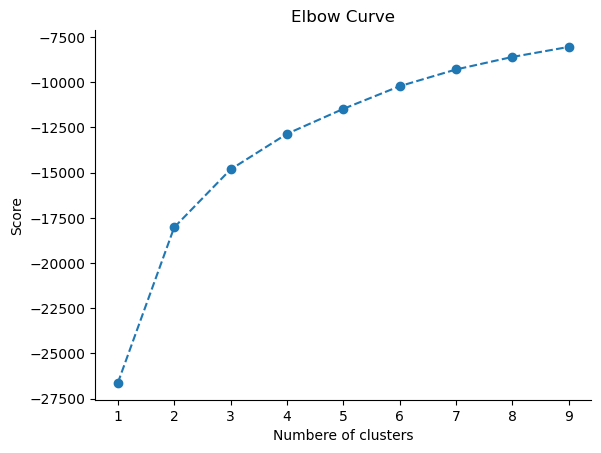

In [30]:
# Create the range of for clusters
num_cl = range(1,10)
# Define k-means object with k number
kmeans = [KMeans(n_clusters=k) for k in num_cl]
score = [kmeans[k].fit(movies_std).score(movies_std) for k in range(len(kmeans))]

# Create plot to show the elbow curve to define the number of clusters we need
pl.plot(num_cl, score,linestyle = '--',marker = 'o')
pl.xlabel('Numbere of clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
sns.despine()
pl.show()

Actually by using the elbow technique is hard to define whether the best number of clusters is 2 or 3 or even more, so I will use the silhouette method.

# Silhouette technique

In [24]:
from sklearn.metrics import silhouette_score

In [26]:
scores = []
range_values = np.arange(2,10)
for k in range_values:
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit(movies_std)
    score = silhouette_score(movies_std, kmeans.labels_,
                            metric='euclidean', sample_size=len(movies_std))
    print('\nMumber of clusters = ',k)
    print('Silhouette score = ',score)
    scores.append(score)


Mumber of clusters =  2
Silhouette score =  0.5749341990601726

Mumber of clusters =  3
Silhouette score =  0.24082773400029198

Mumber of clusters =  4
Silhouette score =  0.23871284730702885

Mumber of clusters =  5
Silhouette score =  0.22807842336026832

Mumber of clusters =  6
Silhouette score =  0.23068509913146332

Mumber of clusters =  7
Silhouette score =  0.23708293553396162

Mumber of clusters =  8
Silhouette score =  0.24352122943661894

Mumber of clusters =  9
Silhouette score =  0.20600220812907488


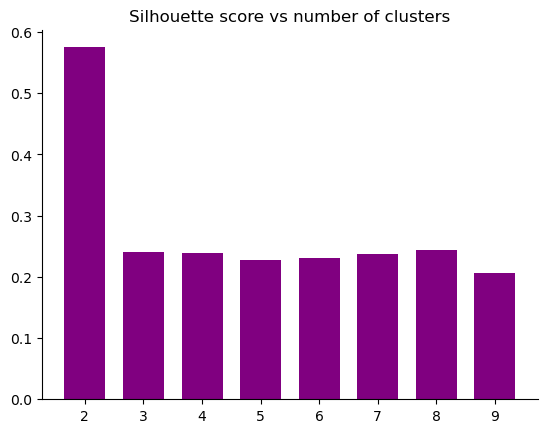

In [28]:
# Plot the score to define the best number of clusters
plt.bar(range_values, scores, width=0.7, color='purple')
plt.title('Silhouette score vs number of clusters')
sns.despine()
plt.show()

Here, by uising the silhouette technique we can clearly to define the best number of clusters for this data set is 2.

# K-means clustering

In [31]:
# Create the kmeans object by using the number of clusters we got 2
kmeans = KMeans(n_clusters = 2)

In [35]:
# Create a 'clusters' feature by using the fit_predict
movies['clusters'] = kmeans.fit_predict(movies_std)
movies.head()

,budget,popularity,revenue,movie_duration,rating_average,vote_count,clusters
0,237000000,150.437577,2.787965e+09,162.0,7.2,11800.0,1
1,300000000,139.082615,9.610000e+08,169.0,6.9,4500.0,1
2,245000000,107.376788,8.806746e+08,148.0,6.3,4466.0,1
3,250000000,112.312950,1.084939e+09,165.0,7.6,9106.0,1
4,260000000,43.926995,2.841391e+08,132.0,6.1,2124.0,1


In [37]:
movies['clusters'].value_counts()

0    4023
1     415
Name: clusters, dtype: int64

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Visualizations Clustered data by different variables

## Plot 'popularity' and 'vote_count'

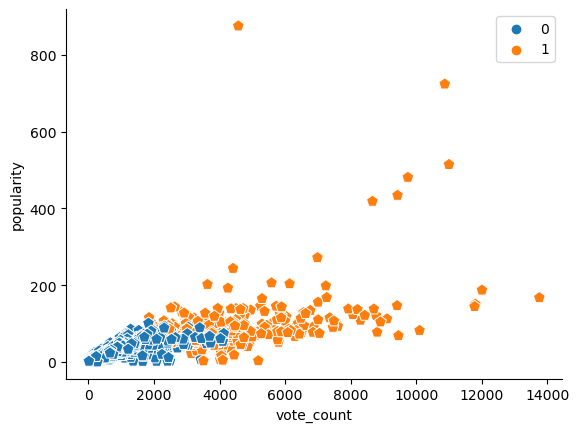

In [38]:
# Plot the clusters for the 'popularity' and 'vote_count' variables
sns.scatterplot(y = movies['popularity'],
               x = movies['vote_count'],
               hue = kmeans.labels_, s = 80,
               marker = 'p')
sns.despine()
plt.show()

The scatter plot shows above indicates that there aren't any point for number of votes greater than 5000 in blue color('0' in the legend). The orange color('1' in the legend) denotes a high vote number with a high popularity too, this proves my hypothesis that the higher votes, the higher popularity for a movie.

## Plot 'budget' and 'popularity' variables

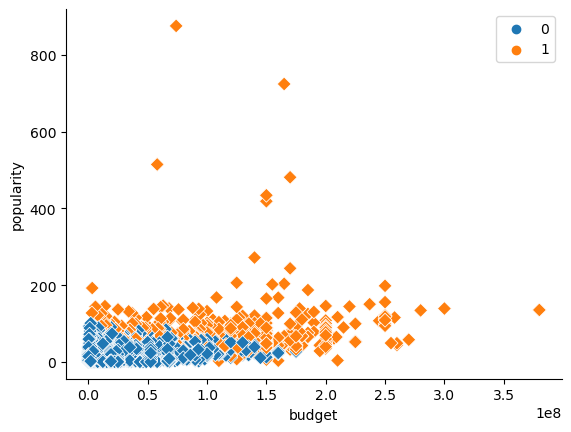

In [39]:
# Plot the clusters for the 'popularity' and 'budget' variables
sns.scatterplot(y = movies['popularity'],
               x = movies['budget'],
               hue = kmeans.labels_, s = 50,
               marker = 'D')
sns.despine()
plt.show()

This scatter plot shows that there is hardly to see the popularity above 200 with a blue color. The orange color shows some of the points with a high popularity number between 300 and 800, belong with a high budget cost.It proves it is hard to gains a high popularity with the budget cost under 1 billion. Although the popularity above 200 not showing as many as under 200, it still proves a movie with a high cost would be able to be considered as a high populairty movie for sure.

## Plot 'revenue' and 'popularity' variables

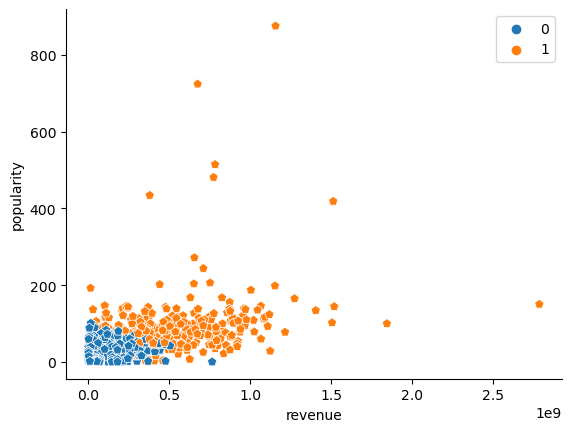

In [40]:
# Plot the clusters for the 'popularity' and 'revenue' variables
sns.scatterplot(y = movies['popularity'],
               x = movies['revenue'],
               hue = kmeans.labels_, s = 50,
               marker = 'p')
sns.despine()
plt.show()

It shows a clsoe relationship as budget, then a movie with a high revenue would be able to be considered as a high populairty movie for sure.

## Plot 'revenue' and 'budget' variables

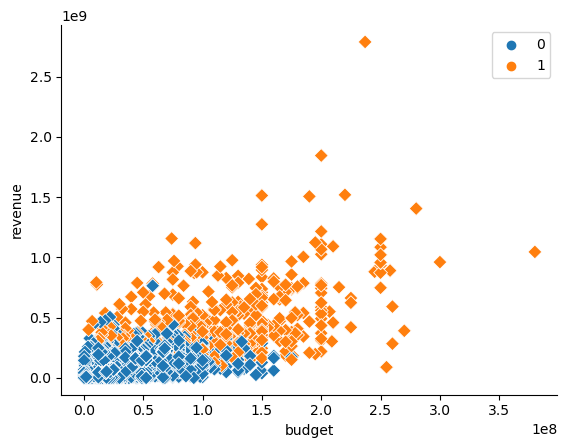

In [41]:
# Plot the clusters for the 'popularity' and 'revenue' variables
sns.scatterplot(y = movies['revenue'],
               x = movies['budget'],
               hue = kmeans.labels_, s = 50,
               marker = 'D',
               cmap = 'blues')
sns.despine()

plt.show()

All of the high revenue gains such like revenue gianed above 10 billions are from the orange color, the orange color indicates most of the points clustered in a high budegt cost, then a high budget cost gains a high revenue is possible.

# Calculate the descriptive statistics

In [44]:
# Define the color into two groups by using for-loop
color = []
for value in movies['clusters']:
    if value == 0:
        color.append('blue')
    elif value == 1:
        color.append('orange')
    else:
        color.append('Unknow')

# Put the three color groups into a column called 'cluster'
movies['cluster'] = color

In [45]:
# Groupby cluster to show the statistics data
movies.groupby('cluster').agg({'budget':['mean','median'],
                                 'popularity':['mean','median'],
                                 'revenue':['mean','median'],
                                 'movie_duration':['mean','median'],
                                 'rating_average':['mean','median'],
                                 'vote_count':['mean','median']})

budget              popularity                  revenue  \
                 mean       median       mean     median          mean   
cluster                                                                  
blue     2.781150e+07   19100162.0  16.472532  12.257654  7.120516e+07   
orange   1.144782e+08  115000000.0  82.448536  68.140214  4.737145e+08   

                     movie_duration        rating_average          vote_count  \
              median           mean median           mean median         mean   
cluster                                                                         
blue      49792182.0     106.565355  103.0       6.142048    6.2   427.714144   
orange   391081192.0     124.081928  122.0       6.811807    6.8  3704.009639   

                 
         median  
cluster          
blue      221.0  
orange   3147.0

After we calculated the statistics for these two numerical variables, we can clearly to find out that the orangecolor is much better than the blue color.

1:The budget, popularity and revenue are all the highest, especilly the revenue is much higher than blue.

2:Vote count is obviously the higner than blue.

3:This really helpful to define a high popularity movie as: a movie considered as a high popularity movie would be cost a high budget with an average 4.7 billions revenue gianed, and the movie duration cann't be shorter than 122 minutes.